# Data Cleaning and Exploratory Data Analysis

Anthony Amadasun

December 15th 20223

---

### Introduction

Dataset contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010. The type of information contained in the data is similar to what a typical home buyer would want to know before making a purchase. 

---

### Importing Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---

### Load in Data

In [27]:
# read in both csvs
file_path_test = '../data/test.csv'
df_test = pd.read_csv(file_path_test)

file_path_train = '../data/train.csv'
df_train = pd.read_csv(file_path_train)

---

### Exploratory Data Analysis Initial Check

- columns has spaces between them
- Figure out what columns are present in train dataset but not in test dataset
- Determine _what_ missing values mean.
- Figure out what each categorical value represents.
- Examine the correlational structure of the predictors
- Descriptive Statistic of SalesPrice and identification of outliers.
- understand the shape of the dataset
- Consider whether discrete values are better represented as categorical or continuous. (Are relationships to the target linear?)

In [28]:
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [29]:
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [30]:
#column names that are present in df_train but not in df_test
[col for col in df_train.columns if col not in df_test.columns]

['SalePrice']

In [31]:
#check which columns are missing values
df_train.isnull().sum().sort_values(ascending = False).head(26)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Mas Vnr Type      1240
Fireplace Qu      1000
Lot Frontage       330
Garage Qual        114
Garage Finish      114
Garage Yr Blt      114
Garage Cond        114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Cond           55
Bsmt Qual           55
BsmtFin Type 1      55
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Garage Cars          1
dtype: int64

**Missing Values Interpretation**
- **Pool QC, Misc Feature, Alley, Fence, Mas Vnr Type, Fireplace Qu, Garage Qual, Garage Finish, Garage Cond, Garage Type, Bsmt Exposure, BsmtFin Type 2, Bsmt Cond, and Bsmt Qual** have missing values because the corresponding features are not present for certain house. Rather than drop NA, replace this missing value with "None" category instead.

- **Lot Frontage** missing values indicate that information about the linear feet of street connected to the property is not available. Will need to fill missing values using imputation(the median or mean) 

- **Mas Vnr Area, Garage Yr Blt, BsmtFin SF 1, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Garage Cars Bsmt Full Bath, and Bsmt Half Bath**, missing value indicates the house doesnt have those features. Will need to fill missing value with 0

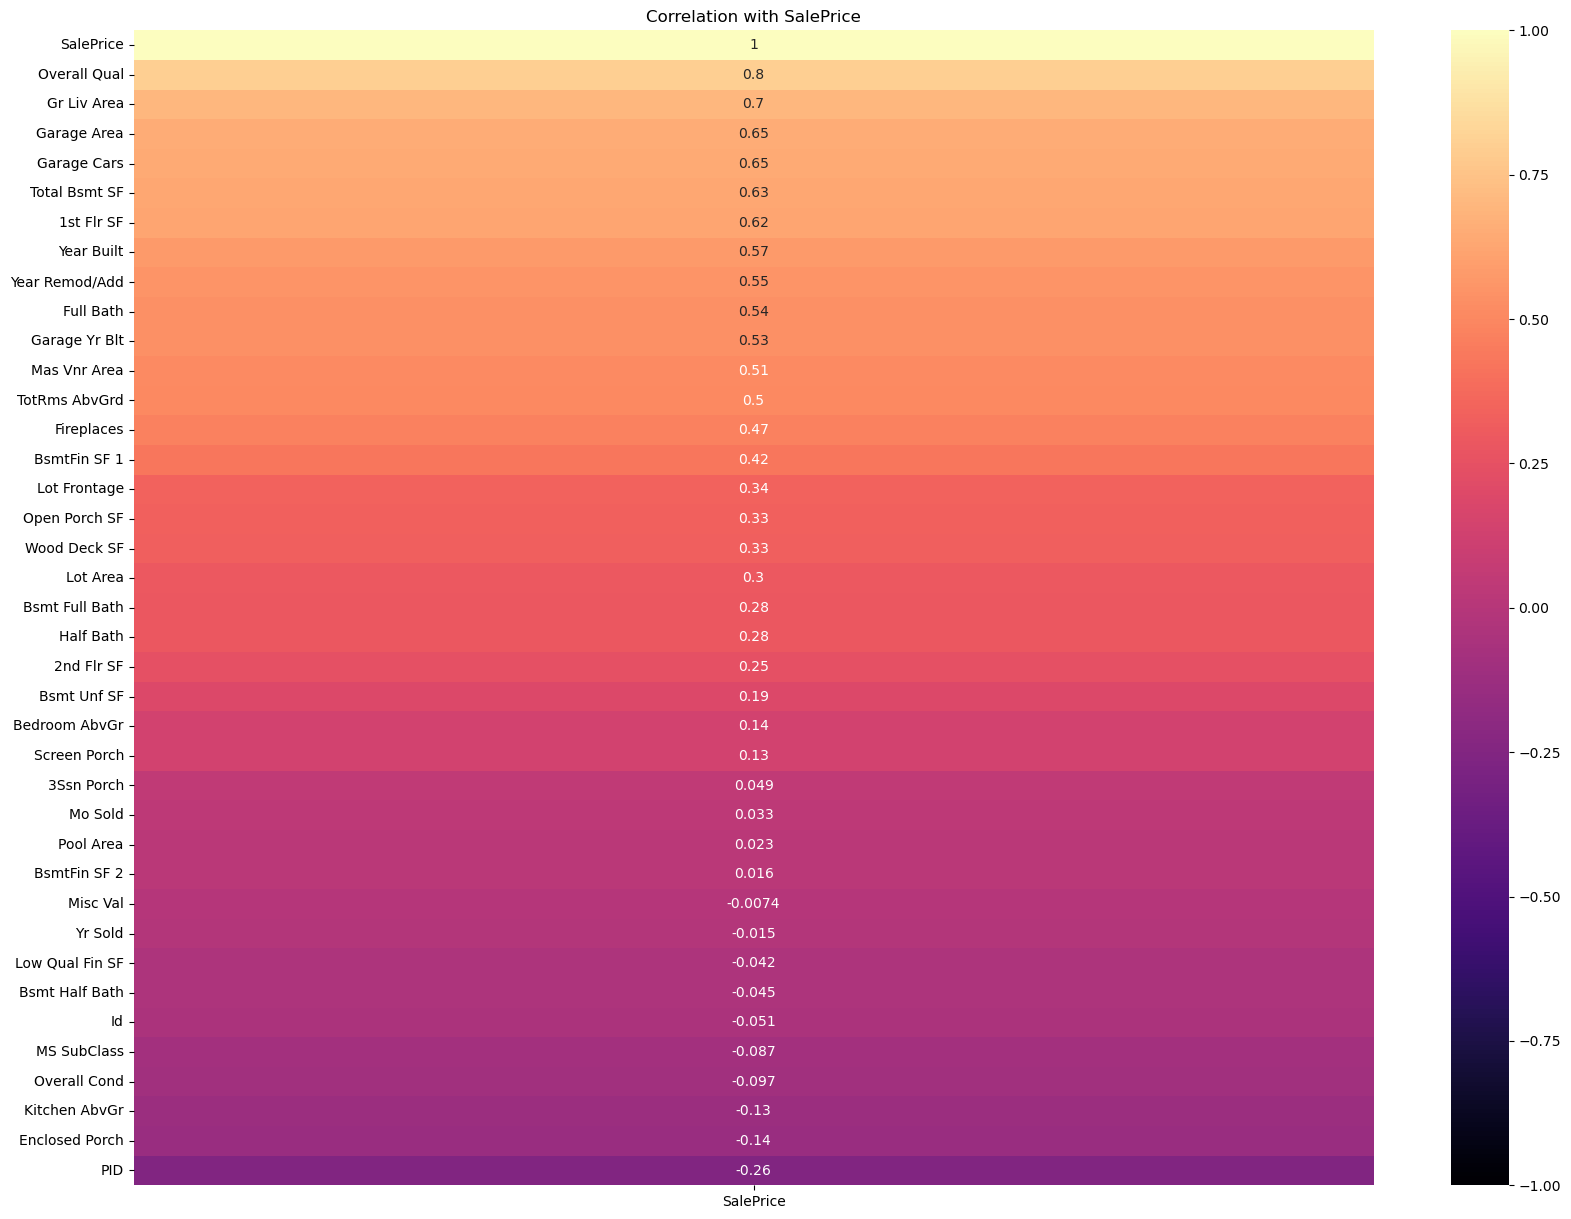

In [32]:
#Examine the correlational structure of the data predictors
#note there will be change in correlation after replacing missing value
numeric_columns = df_train.select_dtypes(include=['number']).columns

plt.figure(figsize=(20, 15))
plt.title('Correlation with SalePrice')
sns.heatmap(df_train[numeric_columns].corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False),
            cmap='magma',
            vmin=-1,
            vmax=1,
            annot=True);



In [33]:
#tabular format
df_train[numeric_columns].corr()[['SalePrice']].sort_values(by= 'SalePrice', ascending= False)

,SalePrice
SalePrice,1.000000
Overall Qual,0.800207
Gr Liv Area,0.697038
Garage Area,0.650270
Garage Cars,0.648220
Total Bsmt SF,0.628925
1st Flr SF,0.618486
Year Built,0.571849
Year Remod/Add,0.550370
Full Bath,0.537969


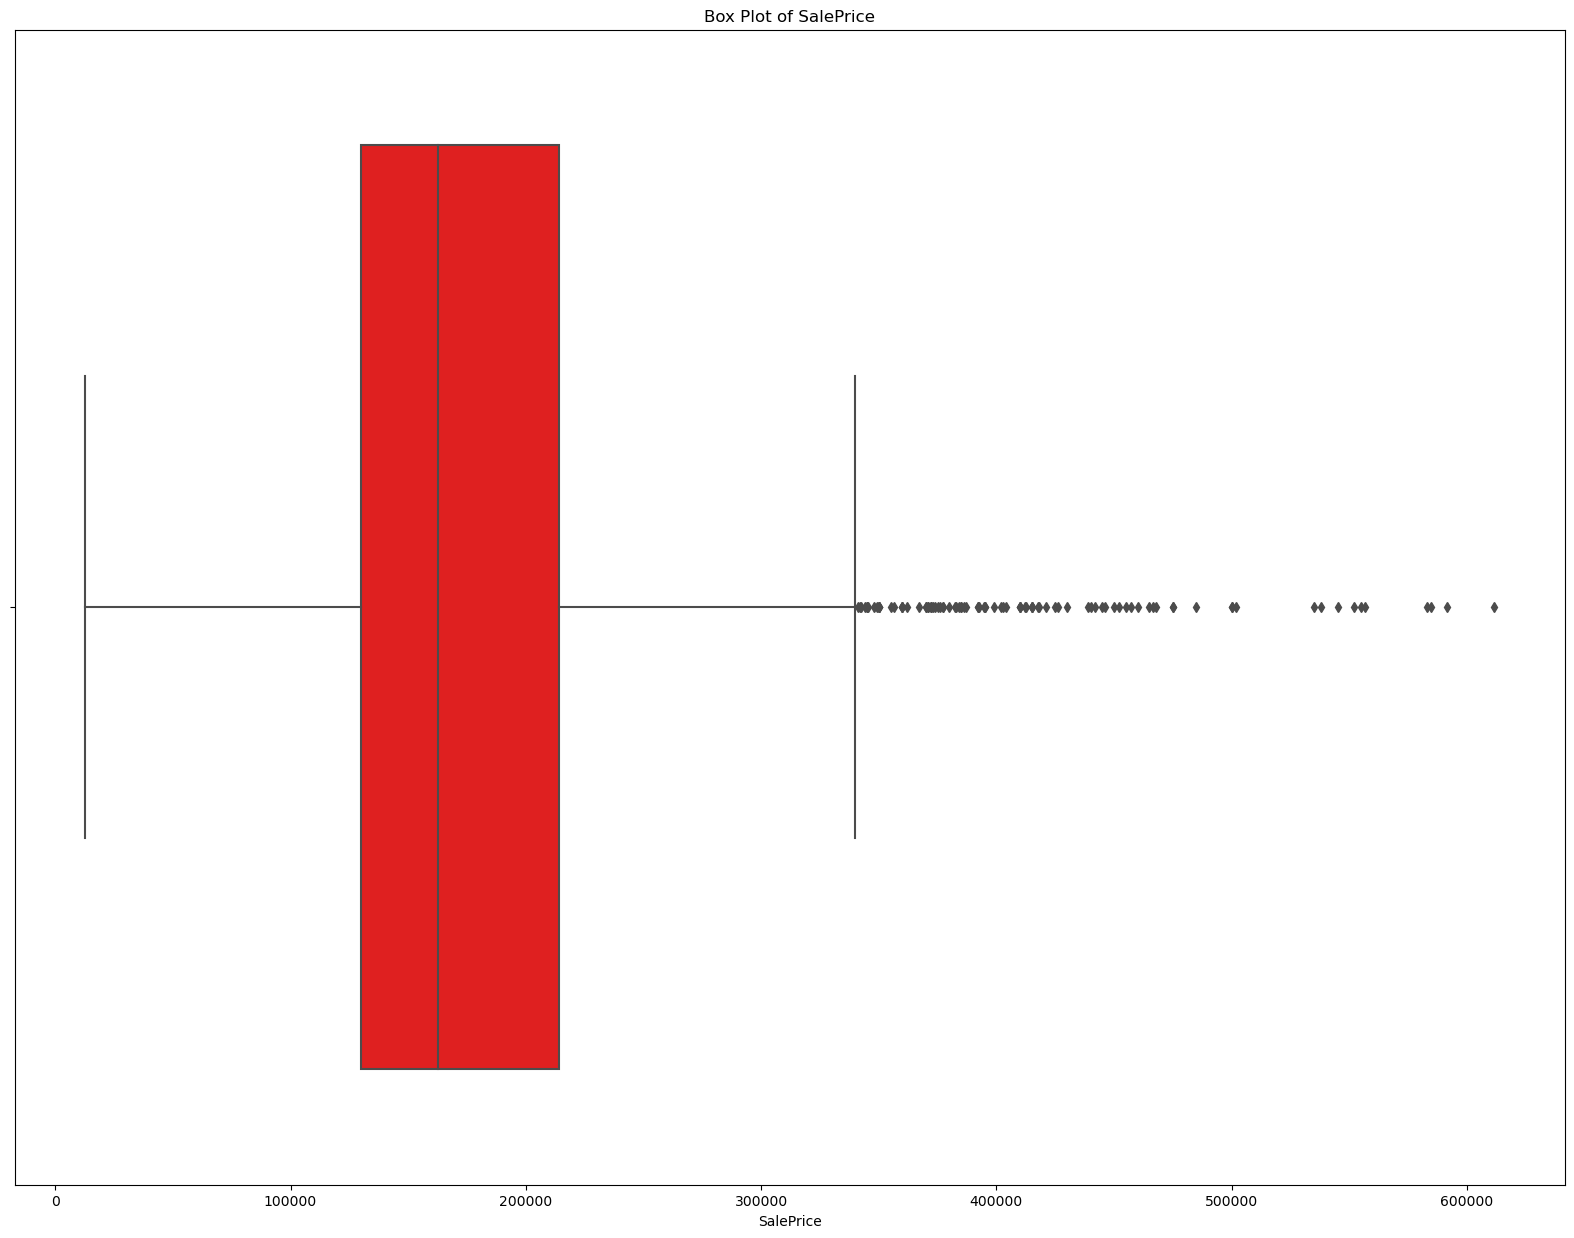

In [34]:
# Outliers in SalePrice
plt.figure(figsize=(20, 15))
sns.boxplot(x='SalePrice', data=df_train, color='red')
plt.title('Box Plot of SalePrice')
plt.show()

Text(0.5, 1.0, 'Box Plot of SalePrice Across A DiscreteVariable')

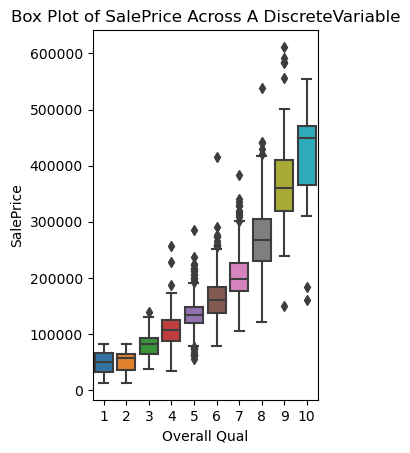

In [35]:
# Box plot to visualize distribution between
# target variable for Overall Qual variable
plt.subplot(1, 2, 2)
sns.boxplot(x='Overall Qual', y='SalePrice', data=df_train)
plt.title('Box Plot of SalePrice Across A DiscreteVariable')


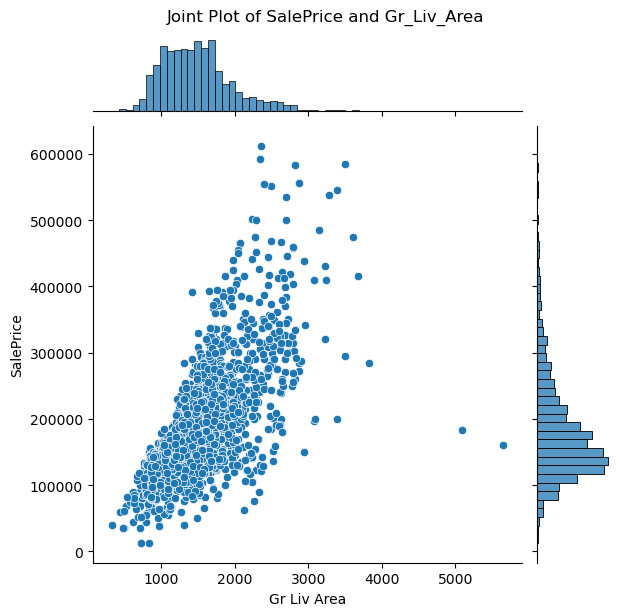

In [36]:
## Joiny plot to visualize distribution between
# target variable for Gr Liv Area variable
sns.jointplot(x='Gr Liv Area', y='SalePrice', data=df_train, kind='scatter')
plt.suptitle('Joint Plot of SalePrice and Gr_Liv_Area', y=1.02)
plt.show()

In [37]:
#descriptive statistic
df_train['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [38]:
df_train.shape

(2051, 81)

In [39]:
df_train.dtypes.head(40)

Id                  int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
Foundation         object
Bsmt Qual          object
Bsmt Cond          object
Bsmt Exposure      object
BsmtFin Type 1     object
BsmtFin SF 1      float64
BsmtFin Type 2     object
BsmtFin SF 2      float64
Bsmt Unf SF 

/Users/aamad_000/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


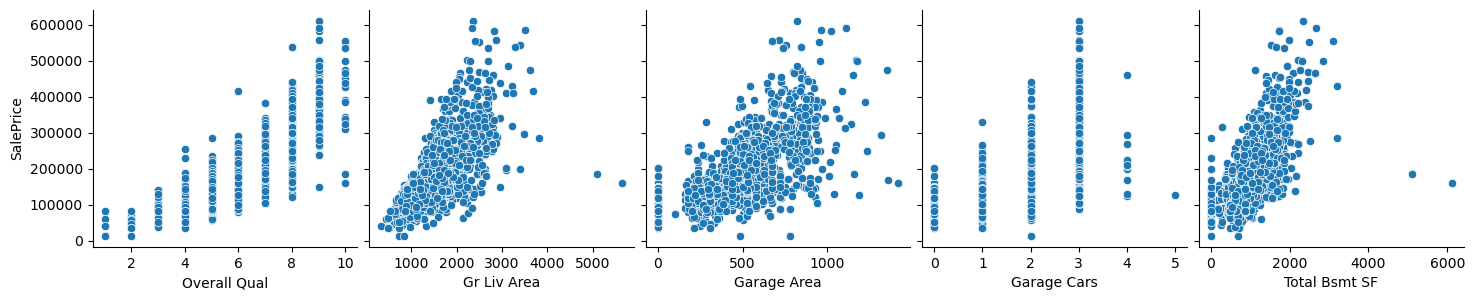

In [40]:
# relationships btw the discrete variables and the target variable
#checking whether relationship to the target is linear
#top 5 based on correlation

sns.pairplot(data = df_train,
            x_vars = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 
                      'Garage Cars', 'Total Bsmt SF'],
            y_vars = ['SalePrice'], height=3);


/Users/aamad_000/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


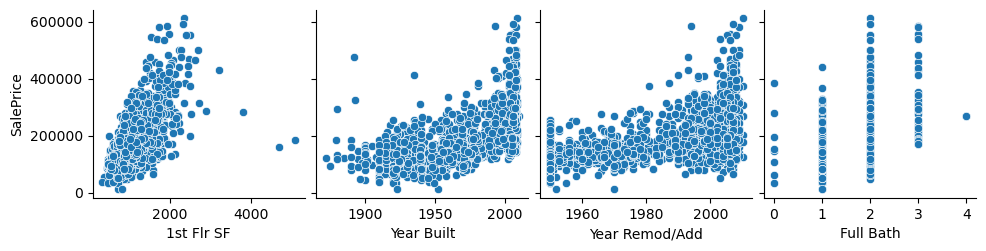

In [41]:
#next 4 based on correlation
sns.pairplot(data = df_train,
            x_vars = ['1st Flr SF','Year Built', 
                      'Year Remod/Add', 'Full Bath'],
            y_vars = ['SalePrice']);

---

### Data Cleaning 

**Check the following in the cells below:**

- change columns to snake case naming convention
- Impute null values, replace missing values with "None" or 0 based on EDA interpretation
- Handle outliers.
- Combine any features e.g., one hot encoding?
- Do you want to have interaction terms?
- Do you want to manually drop collinear features?

**snake case naming convention**

In [42]:
df_train.columns = df_train.columns.str.replace(' ', '_')
df_test.columns = df_test.columns.str.replace(' ', '_')

**Replace missing values with None**

In [43]:
repl_val_none = ['Pool_QC', 'Misc_Feature', 'Alley', 'Fence',
                'Mas_Vnr_Type', 'Fireplace_Qu', 'Garage_Qual',
                'Garage_Finish', 'Garage_Cond', 'Garage_Type', 
                 'Bsmt_Exposure', 'BsmtFin_Type_2', 'Bsmt_Cond',
                 'Bsmt_Qual']
# Fill missing values with 'None'
df_train[repl_val_none] = df_train[repl_val_none].fillna('None')


**Imputation(mean)**

In [44]:
mean_lot_frontage = df_train['Lot_Frontage'].mean()
# Fill missing values with the mean
df_train['Lot_Frontage'].fillna(mean_lot_frontage, inplace=True)


**Replace missing values with 0**

In [45]:
repl_val_zero = ['Mas_Vnr_Area', 'Garage_Yr_Blt', 'BsmtFin_SF_1', 
                 'BsmtFin_SF_2', 'Bsmt_Unf_SF', 'Total_Bsmt_SF', 
                 'Garage_Cars', 'Garage_Area', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath']

# Fill missing values with 0 in specified columns
df_train[repl_val_zero] = df_train[repl_val_zero].fillna(0)


**Combine any features e.g., one hot encoding**

The decision on which categorical feature to one-hot encode will depend mostly on domanin knowledge, the number of unique categories, and the potential impact on the model. Only the  Neighborhood column will be One hot encoded for the reason to not introduce too many features, which could lead to the curse of dimensionality. The code for that will be found in 02_Prepressing_and_Feature_Engineering.ipynb. Based on domain knowledge, the Neighborhood which a property is located can significantly influence its price. Different neighborhoods may have different amenities, safety levels, school districts, and overall desirability, all of which can impact property values. As such, that influenced my decision to select this column to encode. 



In [46]:
unique_neighborhoods = df_train['Neighborhood'].unique()
unique_neighborhoods

array(['Sawyer', 'SawyerW', 'NAmes', 'Timber', 'Edwards', 'OldTown',
       'BrDale', 'CollgCr', 'Somerst', 'Mitchel', 'StoneBr', 'NridgHt',
       'Gilbert', 'Crawfor', 'IDOTRR', 'NWAmes', 'Veenker', 'MeadowV',
       'SWISU', 'NoRidge', 'ClearCr', 'Blmngtn', 'BrkSide', 'NPkVill',
       'Blueste', 'GrnHill', 'Greens', 'Landmrk'], dtype=object)

In [47]:
df_onehot_neigh = pd.get_dummies(df_train['Neighborhood'], prefix='Neighborhood', dtype=int)

df_cleaned = pd.concat([df_train, df_onehot_neigh], axis=1)

In [48]:
df_cleaned.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,109,533352170,60,RL,69.0552,13517,Pave,None,IR1,Lvl,...,0,0,0,0,1,0,0,0,0,0
1,544,531379050,60,RL,43.0000,11492,Pave,None,IR1,Lvl,...,0,0,0,0,0,1,0,0,0,0
2,153,535304180,20,RL,68.0000,7922,Pave,None,Reg,Lvl,...,0,0,0,0,0,0,0,0,0,0
3,318,916386060,60,RL,73.0000,9802,Pave,None,Reg,Lvl,...,0,0,0,0,0,0,0,0,1,0
4,255,906425045,50,RL,82.0000,14235,Pave,None,IR1,Lvl,...,0,0,0,0,0,1,0,0,0,0


**Interactive term**

There are some interactive terms that can be created from the dataset. The interactive term that was created was intended to help reduce dimensionality. interaction_total_bathroom captures the information contained in 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', and 'Half Bath'. The original colums does not serve much purpose to the modeling goal by itself, so they were dropped.

**Do you want to manually drop collinear features?**

It's typically best practices to remove variables if they are highly correlated. However,one of the features in Gr_Liv_Area is important for the model in predicting the target variable. The following features BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF', 'Total_Bsmt_SF','1st_Flr_SF', '2nd_Flr_SF', and 'Low_Qual_Fin_SF' shows signs of multicollinearity, so they wont be used to predict target variable. The code for this can be seen in 02_Preprocessing_and_Feature_Engineering.ipynb as part of the feature selection section

/Users/aamad_000/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


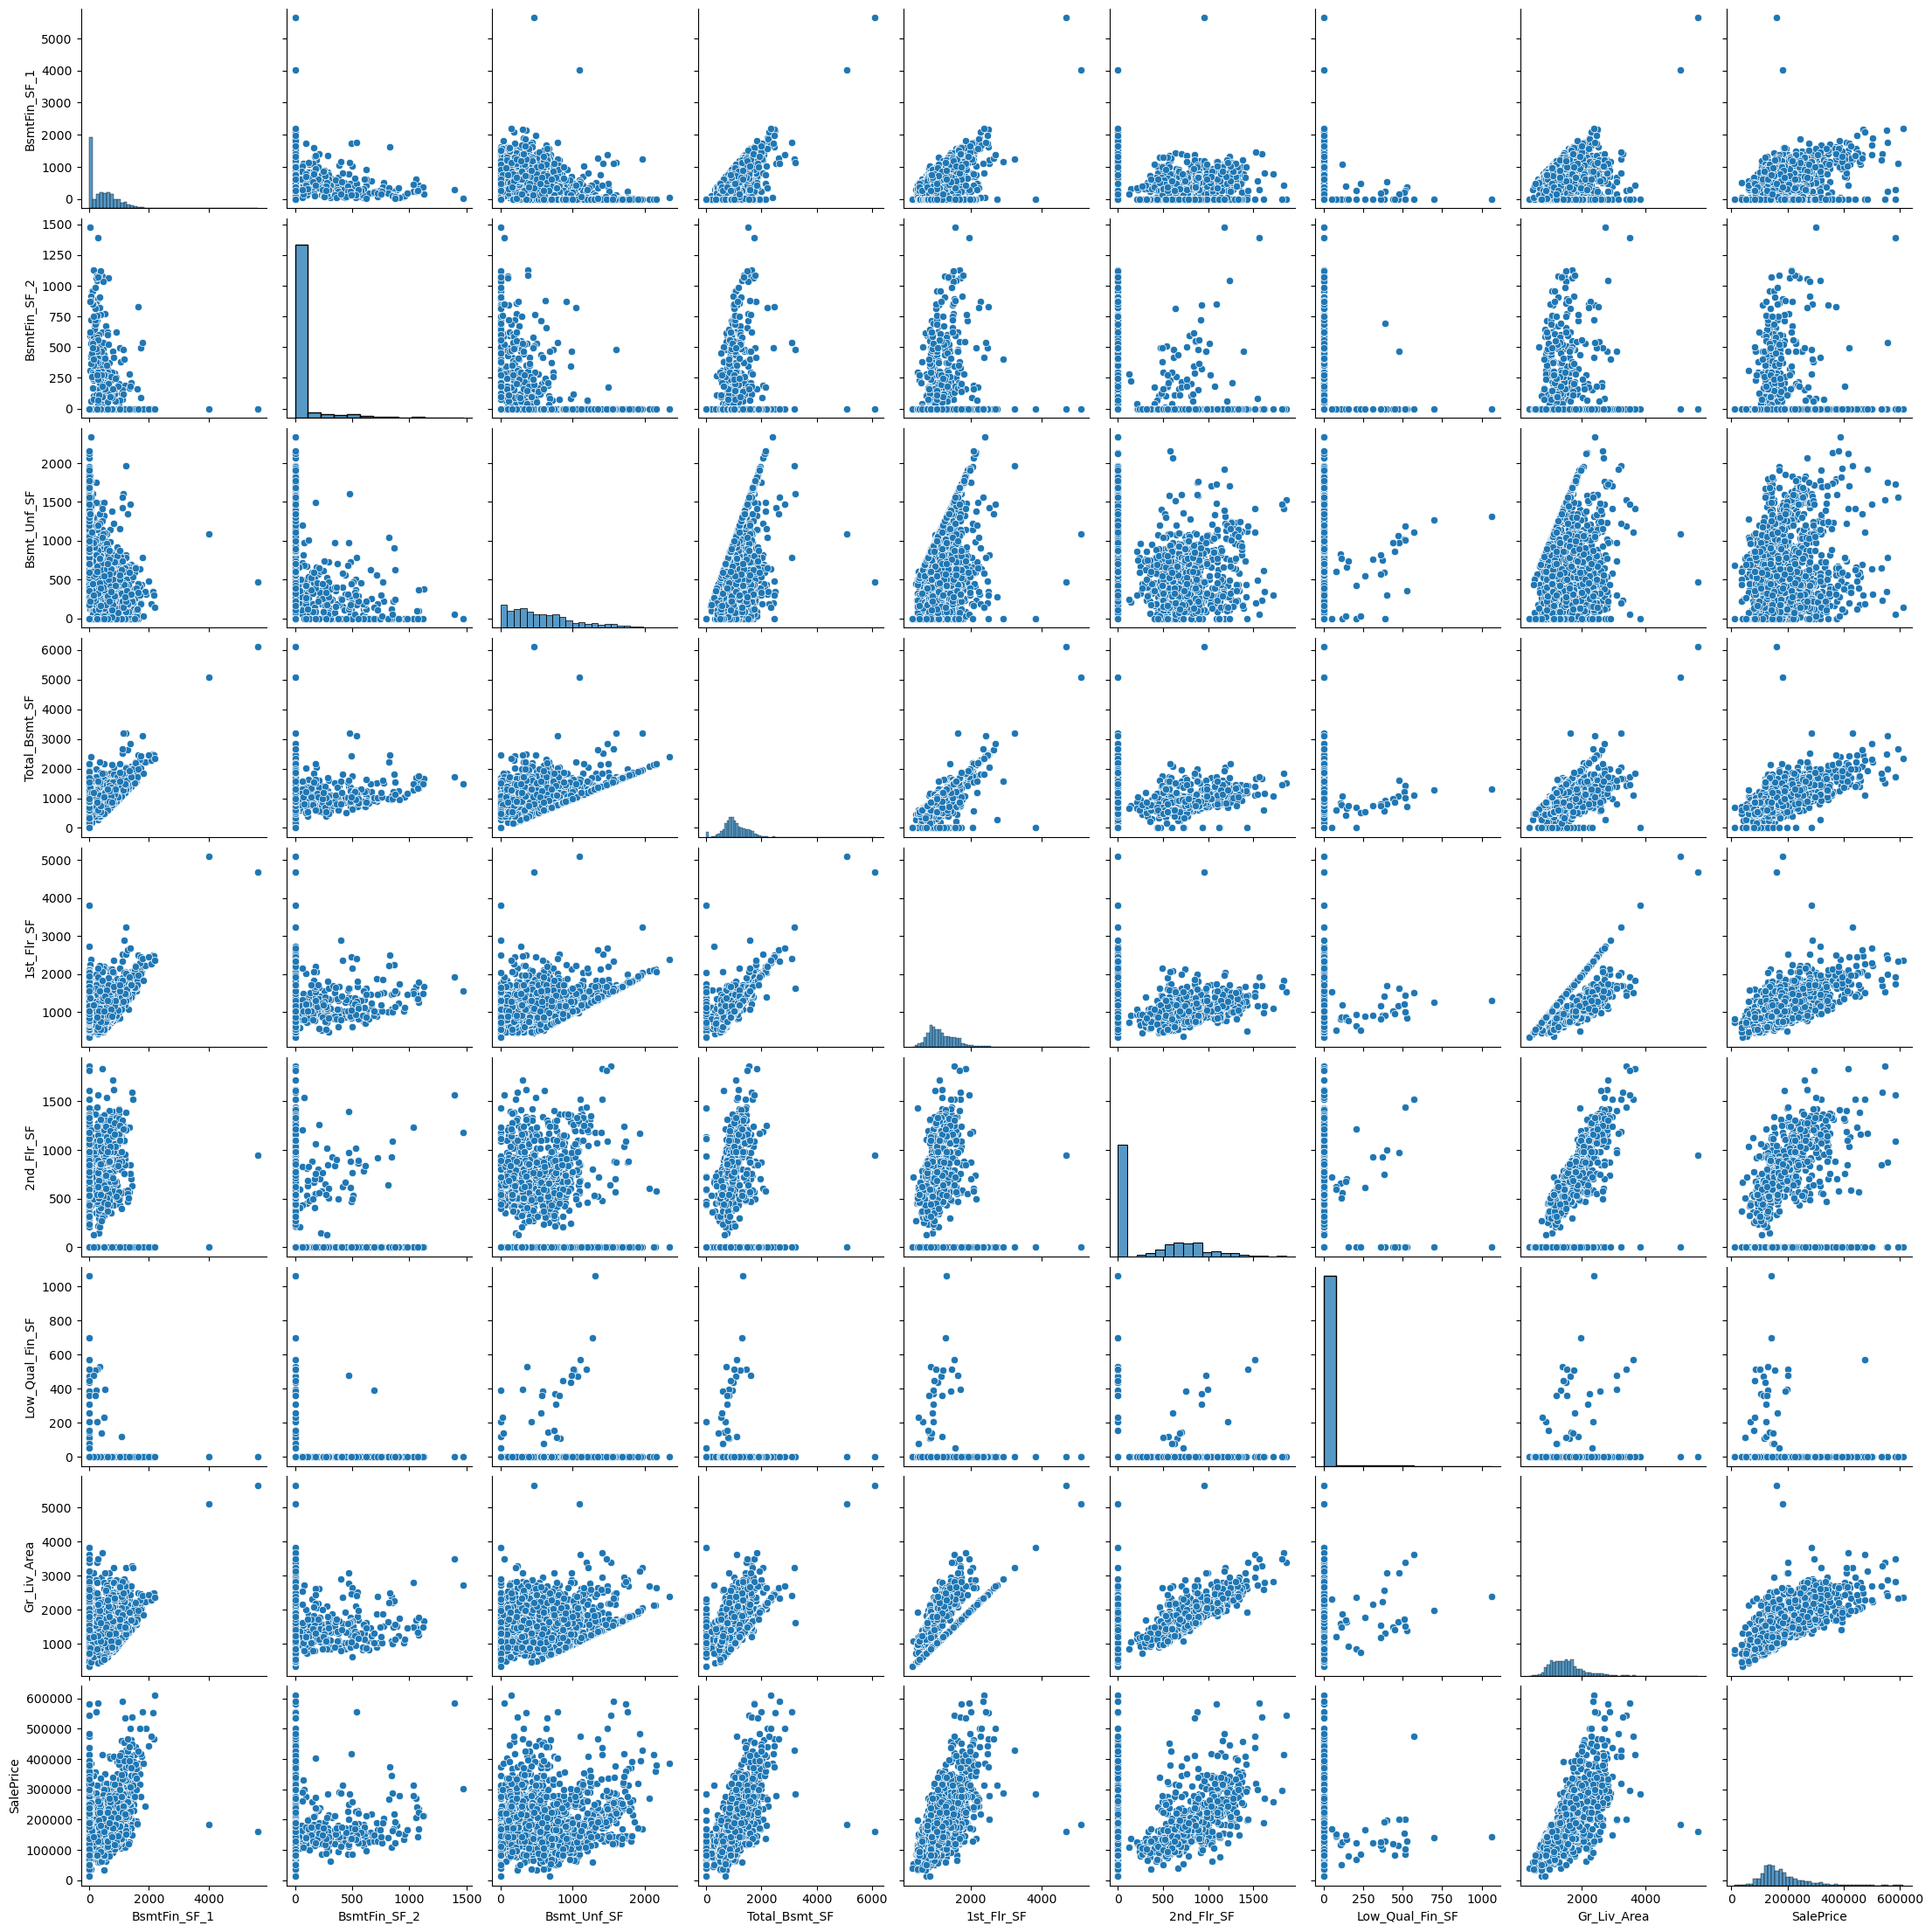

In [49]:
# pairplot of multicollinearity
features = ['BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF', 'Total_Bsmt_SF',
            '1st_Flr_SF', '2nd_Flr_SF', 'Low_Qual_Fin_SF', 'Gr_Liv_Area', 'SalePrice']
pairplot_data = df_cleaned[features]


sns.pairplot(pairplot_data)
plt.savefig('../images/multicollinearity.png')
plt.show()

In [25]:
# # Save preprocessed data to a CSV file
# df_cleaned.to_csv('../data/test_clean.csv', index=False) 